<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Teguh !

Perkenalkan saya disini sebagai Code Reviewers, disini dengan senang hati saya akan mereview tugas Teguh ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Teguh dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# Pendahuluan

Pada proyek kali ini kita akan membantu perusahaan **Zuber** untuk menemukan pola dari informasi yang tersedia. Kemudian kita akan memahami preferensi penumpang dan dampak faktor eksternal terhadap perjalanan.

Hipotesis yang kita uji :
- Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah saat hujan di hari Sabtu.

`<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Mempersiapkan Data

In [1]:
# mengimport library yang dibutuhkan
import pandas as pd
from scipy import stats as st
import numpy as np

# statistik
from scipy.stats import normaltest

# visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# memuat data
company_info = pd.read_csv('/datasets/project_sql_result_01.csv')
time_trips = pd.read_csv('/datasets/project_sql_result_04.csv')
trips_from_loop = pd.read_csv('/datasets/project_sql_result_07.csv')

### Melihat Informasi Umum Data

#### Data Jumlah Perjalanan Tiap Perusahaan (`company_info`)

In [3]:
# melihat informasi umum dataset company_info
company_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
# melihat contoh data
company_info.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


Untuk tipe data pada dataset ini tidak ada yang perlu diubah.

Sedangkan untuk data yang dimuat adalah:
- `company_name`: nama perusahaan taksi
- `trips_amount`: jumlah perjalanan untuk setiap perusahaan taksi pada tanggal 15-16 November 2017.

#### Data Jumlah Waktu Tiap Perjalanan (`time_trips`)

In [5]:
# informasi time_trips
time_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [6]:
# contoh data di time_trips
time_trips.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


Untuk tipe data pada dataset ini juga tidak ada yang perlu diubah.

Dan data yang dimuat adalah:
- `dropoff_location_name`: nama wilayah di Chicago tempat perjalanan berakhir
- `average_trips`: jumlah rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017.

#### Data Perjalanan dari Wilayah Loop (`trips_from_loop`)

In [7]:
# informasi trips_from_loop
trips_from_loop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [8]:
# contoh data trips_from_loop
trips_from_loop.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


Sepertinya untuk dataset ini kita perlu mengubah tipe data pada kolom `start_ts` menjadi tipe datetime.

Dan untuk data yang dimuatnya adalah:
- `start_ts` -- tanggal dan waktu penjemputan
- `weather_conditions` -- kondisi cuaca saat perjalanan dimulai
- `duration_seconds` -- durasi perjalanan dalam satuan detik

Sekarang mari kita lihat deskripsi umum dari keseluruhan dataset

In [9]:
# menampilkan deskripsi umum ke-3 dataset dengan urutan
## 1. dataset informasi perusahaan (company_info)
## 2. dataset lokasi pengantaran (time_trips)
## 3. dataset laporan perjalanan dari loop ke bandara O`Hare (trips_from_loop)
display(company_info.describe(include='all').transpose(), 
        time_trips.describe(include='all').transpose(), 
        trips_from_loop.describe(include='all').transpose())

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company_name,64,64,City Service,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trips_amount,64.0,NaN,NaN,NaN,2145.484375,3812.310186,2.0,20.75,178.5,2106.5,19558.0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dropoff_location_name,94,94,West Pullman,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
average_trips,94.0,NaN,NaN,NaN,599.953728,1714.591098,1.8,14.266667,52.016667,298.858333,10727.466667


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
start_ts,1068,81,2017-11-11 10:00:00,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather_conditions,1068,2,Good,888,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_seconds,1068.0,NaN,NaN,NaN,2071.731273,769.461125,0.0,1438.25,1980.0,2580.0,7440.0


**Kesimpulan**

1. Kita mempunyai 64 perusahaan dimana jumlah perjalanan paling banyak yaitu mencapai `19558` dan jumlah perjalanan paling sedikit yaitu `2`.
2. Untuk jumlah perjalanan rata-rata pengantaran diberbagai lokasi nilai maksimalnya `10727` dan terdapat 94 lokasi pengantaran.
3. Sedangkan untuk kategori beberapa perjalanan dalam sehari, waktu yang dihabiskan paling banyak `7440` detik.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Mengubah Tipe Data

Mari kita ubah tipe data didataset `trips_from_loop` pada kolom `start_ts` ke datetime.

In [10]:
# mengubah kolom `start_ts` ke datetime
trips_from_loop['start_ts'] = pd.to_datetime(trips_from_loop['start_ts'], format='%Y-%m-%d %H:%M:%S')

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Memperkaya Kualitas Data

Karena sebelumnya dataset `trips_from_loop` ada yang berupa tanggal, mari kita coba uraikan untuk mendapatkan hari dan jamnya.

In [11]:
# mendapatkan tanggal
trips_from_loop['date'] = trips_from_loop['start_ts'].dt.date
# mendapatkan informasi hari
trips_from_loop['day_name'] = trips_from_loop['start_ts'].dt.day_name()
# mendapatkan informasi jam
trips_from_loop['hours'] = trips_from_loop['start_ts'].dt.hour

In [12]:
trips_from_loop.sample(5)

,start_ts,weather_conditions,duration_seconds,date,day_name,hours
336,2017-11-11 10:00:00,Good,1560.0,2017-11-11,Saturday,10
442,2017-11-11 08:00:00,Good,1205.0,2017-11-11,Saturday,8
460,2017-11-11 10:00:00,Good,1560.0,2017-11-11,Saturday,10
204,2017-11-18 19:00:00,Good,0.0,2017-11-18,Saturday,19
380,2017-11-11 07:00:00,Good,1261.0,2017-11-11,Saturday,7


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Mengidentifikasi Wilayah Pengantaran  dan Perusahaan Teratas

In [13]:
# fungsi untuk dekorasi plot
def bar_height_visualization(data, num_bar):
    for bar in data.patches:
        if num_bar == 'int':
            data.annotate(format(bar.get_height().astype('int')),
                                         (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                                         ha = 'center', va = 'center',
                                         size = 10,
                                         xytext = (0,25),
                                         textcoords = 'offset points',
                                         rotation = 60)
        else:
            data.annotate(format(bar.get_height(), '.2f'),
                                         (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                                         ha = 'center', va = 'center',
                                         size = 10,
                                         xytext = (0,25),
                                         textcoords = 'offset points',
                                         rotation = 60)

Sekarang saatnya kita mengidentifikasi 10 wilayah teratas yang dijadikan sebagai titik pengantaran.

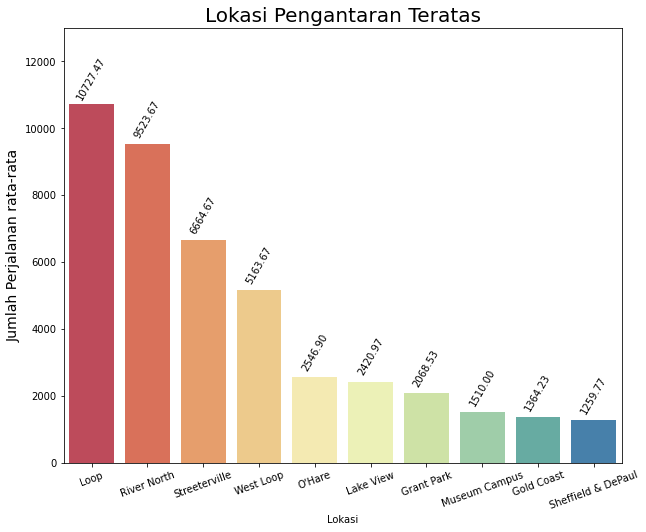

In [14]:
# visualisasi lokasi pengantaran teratas
plt.figure(figsize=(10,8)) # ukuran plot
dropoff_location_plot = sns.barplot(data=time_trips.head(10), 
                                    x='dropoff_location_name', 
                                    y='average_trips', palette='Spectral')

# memanggil fungsi untuk menampilkan angka diatas bar
bar_height_visualization(dropoff_location_plot, 'float')

# fitur plot
plt.ylim(0, 13000)
plt.title('Lokasi Pengantaran Teratas', size=20)
plt.ylabel('Jumlah Perjalanan rata-rata', size=14)
plt.xlabel('Lokasi')
plt.xticks(rotation=20)
plt.show()

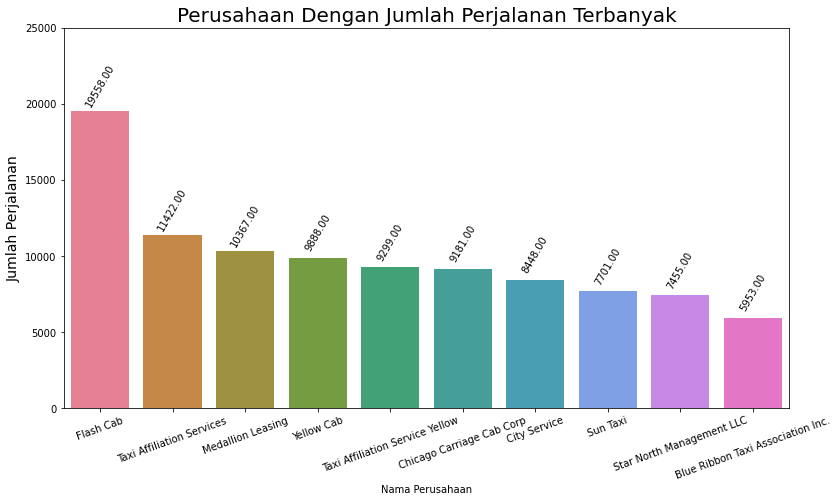

In [15]:
# visualisasi perusahaan teratas
plt.figure(figsize=(13,7)) # ukuran plot
dropoff_location_plot = sns.barplot(data=company_info.head(10), 
                                    x='company_name', 
                                    y='trips_amount', palette='husl')

# memanggil fungsi untuk menampilkan angka diatas bar
bar_height_visualization(dropoff_location_plot, 'float')

# fitur plot
plt.ylim(0, 25000)
plt.title('Perusahaan Dengan Jumlah Perjalanan Terbanyak', size=20)
plt.ylabel('Jumlah Perjalanan', size=14)
plt.xlabel('Nama Perusahaan')
plt.xticks(rotation=20)
plt.show()

**Kesimpulan**

1. Dalam kurun waktu 2 hari (15-16 November 2017) Perusahaan `Flash Cab` yang totalnya (19558) hampir 2x lipat dari perusahaan ke-2 yaitu `Taxi Affiliation Services`.
2. Sedangkan untuk lokasi pengantaran paling favorit selama bulan november adalah `Loop` dan `River Nort`.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Loop - O'Hare

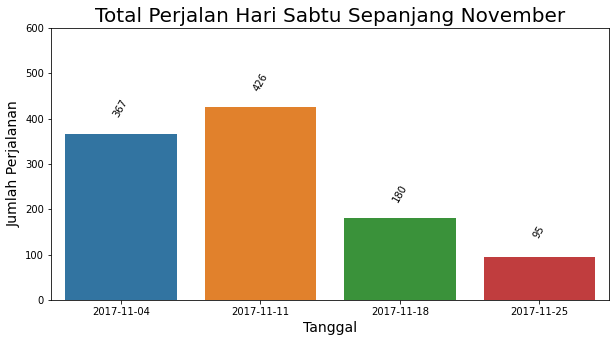

In [16]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=trips_from_loop.sort_values('date'), x='date')

bar_height_visualization(ax, 'int')

plt.title('Total Perjalan Hari Sabtu Sepanjang November', size=20)
plt.ylabel('Jumlah Perjalanan', size=14)
plt.xlabel('Tanggal', size=14)
plt.ylim(0, 600)
plt.show()

Untuk jumlah perjalanan sepanjang bulan november sepertinya para pelanggan lebih sedikit memesan jasa taksi di pertengahan hingga akhir bulan.

In [17]:
piv_count = trips_from_loop.pivot_table(index=['date','hours'], values='duration_seconds', aggfunc='count').reset_index()
piv_count = piv_count.rename(columns={
    'duration_seconds' : 'count'
})
piv_count = trips_from_loop[['date','weather_conditions']].merge(piv_count, on='date', how='left') 

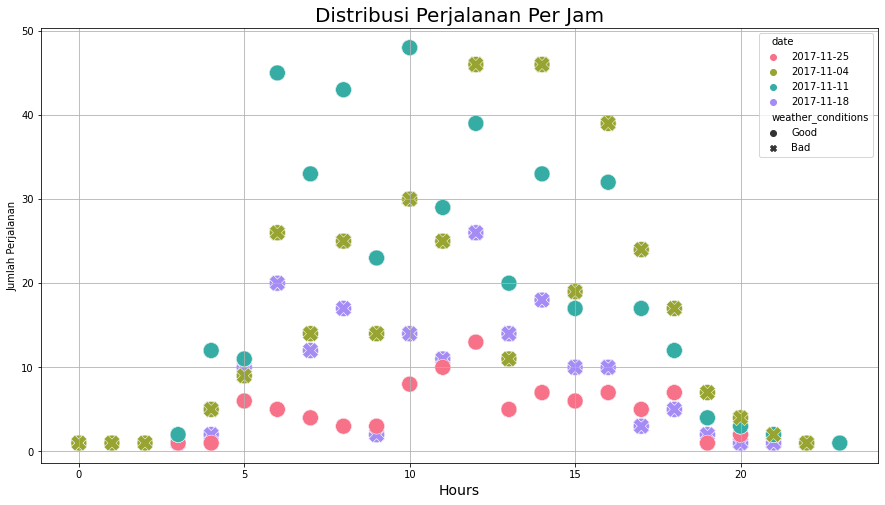

In [18]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=piv_count, y='count', x='hours', hue='date', palette='husl', style='weather_conditions')

ax.collections[0].set_sizes([250])  # mereset ukuran marker di plot
plt.grid(True)
plt.title('Distribusi Perjalanan Per Jam', size=20)
plt.xlabel('Hours', size=14)
plt.ylabel('Jumlah Perjalanan')
plt.show()

Jam sibuk dari layanan taksi kita mulai dari pukul 05:00 pagi hingga pukul 20:00 malam. Dan Sepertinya untuk cuaca hujan itu terjadi pada tanggal `11 dan 18 November 2017`.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Menguji Hipotesis

Saatnya kita menguji hipotesis, disini kita akan menentukan H0 dan H1(Alternatif)-nya:

- H0 : Variansi durasi rata-rata perjalanan saat cuaca hujan dan cerah adalah **sama**.
- H1 : Variansi durasi rata-rata perjalanan saat cuaca hujan dan cerah adalah **berubah**.

Kemudian

- H0 : Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare **sama** saat hujan di hari Sabtu.
- H1 : Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare **berubah** saat hujan di hari Sabtu.

Dan kita menetapkan nilai standar signifikansi (Alpha) = 5%.

Sebelumnya kita cek outlier pada kolom `duration_seconds` dimana jika terdapat outlier kita akan menghapusnya.

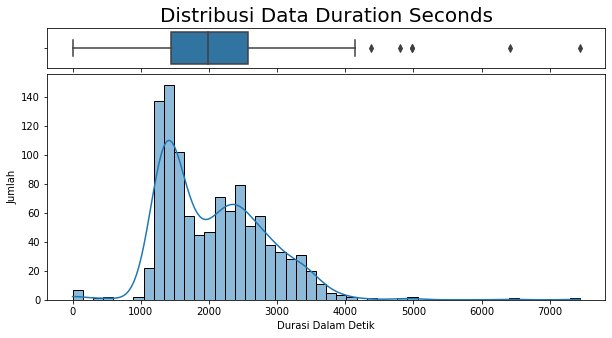

In [19]:
# memeriksa distribusi duration_seconds
fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize= (10, 5),
                              gridspec_kw={'height_ratios' : (.15, .85),
                                          'hspace': .05})

ax1.set_title('Distribusi Data Duration Seconds', size=20)
sns.boxplot(x = trips_from_loop.duration_seconds, ax=ax1) # boxplot
ax1.set(xlabel="")
sns.histplot(data= trips_from_loop.duration_seconds, ax=ax2, stat='count', kde=True, bins=50) # histogram

plt.xlabel('Durasi Dalam Detik')
plt.ylabel('Jumlah')
plt.show()

Ternyata terdapat beberapa outlier dikolom `duration_seconds` kita akan menghapusnya dengan menentukan batas atas dan batas bawahnya.

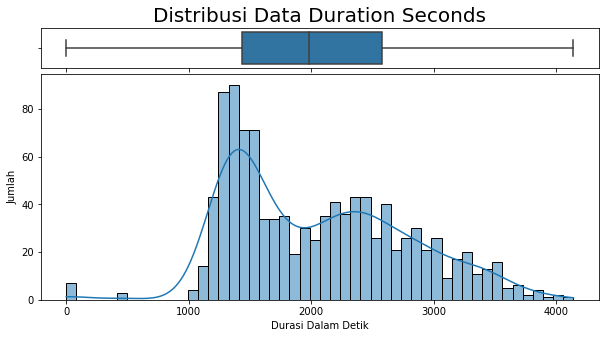

In [20]:
# menentukan Q3 dan Q1
Q1 = trips_from_loop.duration_seconds.quantile(.25)
Q3 = trips_from_loop.duration_seconds.quantile(.75)

# rentang interkuartil
IQR = Q3-Q1
# menentukan batas atas dan bawah
upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)

# menghapus outlier
trips_from_loop = trips_from_loop.query('duration_seconds >= @lower_limit and duration_seconds <= @upper_limit')

# melihat distribusi akhir pada duration second
fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize= (10, 5),
                              gridspec_kw={'height_ratios' : (.15, .85),
                                          'hspace': .05})

ax1.set_title('Distribusi Data Duration Seconds Tanpa O', size=20)
sns.boxplot(x = trips_from_loop.duration_seconds, ax=ax1) # boxplot
ax1.set(xlabel="")
sns.histplot(data= trips_from_loop.duration_seconds, ax=ax2, stat='count', kde=True, bins=50) # histogram

plt.xlabel('Durasi Dalam Detik')
plt.ylabel('Jumlah')
plt.show()

Setelah data bersih saatnya kita memfilter data berdasarkan cuaca untuk menguji hipotesis.

In [21]:
# melihat distribusi data dikolom weater_contidion
trips_from_loop.weather_conditions.value_counts()

Good    883
Bad     179
Name: weather_conditions, dtype: int64

In [22]:
# melihat distribusi data dikolom day_name
trips_from_loop.day_name.value_counts()

Saturday    1062
Name: day_name, dtype: int64

Karena dataset ini perjalannya secara keseluruhan merupakan hari sabtu, maka kita akan memfilter nya berdasarkan kondisi cuaca, dimana:
1. `Good` untuk cuaca cerah.
2. `Bad` untuk cuaca hujan.

In [23]:
# cuaca hujan dilabeli dengan tabel rainy
rainy = trips_from_loop.query('weather_conditions == "Bad" ')
# cuaca cerah dilabeli dengan tabel sunny
sunny = trips_from_loop.query('weather_conditions == "Good"')

Sekarang kita akan menguji hipotesis untuk menentukan varians antara cuaca hujan dan cerah sama.

In [26]:
# menguji hipotesis varians
alpha= .05
res = st.levene(rainy['duration_seconds'], sunny['duration_seconds'])

print(f"P-Value : {res.pvalue}")

if res.pvalue < alpha:
    print('Kita Menolak Hipotesis 0 -> Varians keduanya tidak sama')
else:
    print('Kita Tidak Dapat Menolak Hipotesis 0 -> Varians keduanya sama')

P-Value : 0.6196707782686355
Kita Tidak Dapat Menolak Hipotesis 0 -> Varians keduanya sama


**Kesimpulan**

- Variansi durasi rata-rata perjalanan saat cuaca hujan dan cerah adalah **sama**

Dari hasil uji dapat dilihat bahwa varians `duration_seconds` untuk kedua cuaca adalah sama, maka kita akan mengatur `equal_var` = `True`. 

In [25]:
# Menguji hipotesis
alpha = .05 # alpha 5%

res = st.ttest_ind(rainy.duration_seconds, sunny.duration_seconds, equal_var=True)

print(f"P-Value : {res.pvalue}")

if res.pvalue<alpha:
    print("Kita Menolak Hipotesis Nol dan Menerima Hipotesis Alternatif")
else:
    print("Kita Tidak Bisa Menolak Hipotesis Nol")

P-Value : 1.2430038032744411e-13
Kita Menolak Hipotesis Nol dan Menerima Hipotesis Alternatif


**Kesimpulan**

Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare **berubah** saat hujan di hari Sabtu.

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

- caranya sudah tepat, namun ada beberapa catatan
    - sebelum melakukan uji hipotesis cek outliers terlebih dahulu ya di kolom duration_seconds, jika ada outliers bisa dihapus ya
    - untuk cek varians bisa pakai levene test ya (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) supaya hasilnya lebih akurat

</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak sudah dilaksanakan, apakah seperti diatas sudah betul ? kalau masih ada yang perlu saya pelajari mohon diberitahu referensinya lagi kak, terimakasih sebelumnya ya
</div>

## Kesimpulan Umum

Dengan ini kita dapat menyimpulkan bahwa:

- Perusahaan `Flash Cab` dalam 2 hari ternyata mampu mendapatkan total perjalanan hingga 19558 perjalanan. 
- Untuk lokasi pengantaran terfavorit sepanjang bulan November adalah `Loop` dan `River North`.
- Untuk perjalanan dari `Loop` ke bandara `O'Hare` yang terjadi hujan ditanggal `11 dan 18 November` dan juga para pelanggan sepertinya lebih banyak dari awal hingga ke pertengahan bulan.


Dan untuk hipotesis yang diuji dapat disimpulkan bahwa:

- Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare **berubah** saat hujan di hari Sabtu.